# Sample Questions exam

from https://slides.com/javafxpert/prep-qiskit-dev-cert-exam#/16

In [1]:
import math
import numpy as np

from qiskit import Aer, execute

from qiskit.circuit import ClassicalRegister, QuantumRegister, QuantumCircuit, library

from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity,state_fidelity

from qiskit.visualization  import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_histogram

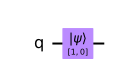

In [2]:
qc = QuantumCircuit(1)
qc.initialize([1,0],0)
qc.draw()

## Question 1: Create QC

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html

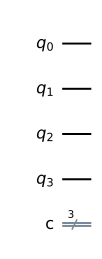

In [3]:
qc = QuantumCircuit(4,3)
qc.draw()

## Question 2: mental gymnastics Bloch Sphere

see https://javafxpert.github.io/grok-bloch/

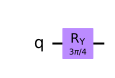

In [4]:
qc = QuantumCircuit(1)
qc.ry(3*math.pi/4,0)
qc.draw()

## Question 3: 3 ways to circuit


https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumRegister.html

In [5]:
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg,ancilla)

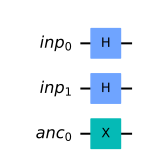

In [6]:
# 1
qc.h(inp_reg)
qc.x(ancilla)
qc.draw()

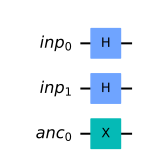

In [7]:
#2
qc = QuantumCircuit(inp_reg,ancilla)

qc.h(inp_reg[0:2])
qc.x(ancilla[0])
qc.draw()

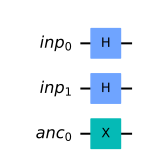

In [8]:
#3
qc = QuantumCircuit(inp_reg,ancilla)

qc.h(inp_reg[0])
qc.h(inp_reg[1])
qc.x(ancilla[0])
qc.draw()

## Question 4

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html


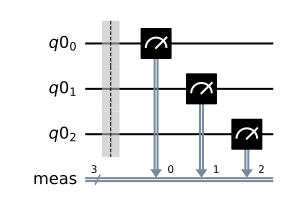

In [9]:
## measure_all

from qiskit.circuit import ClassicalRegister, QuantumRegister, QuantumCircuit

qreg = QuantumRegister(3)
qc = QuantumCircuit(qreg)

qc.measure_all() 
qc.draw()

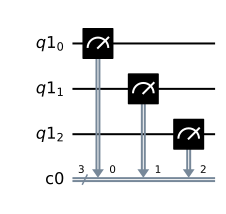

In [10]:
from qiskit.circuit import ClassicalRegister, QuantumRegister, QuantumCircuit

qreg = QuantumRegister(3)
creg = ClassicalRegister(3)
qc = QuantumCircuit(qreg,creg)

qc.measure([0,1,2],[0,1,2]) 
qc.draw()

## Question 5: Entanglement and 4 Bell states

https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html

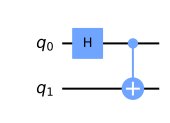

<IPython.core.display.Latex object>

In [11]:
#1
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0,1)
display(bell.draw())

svsim = Aer.get_backend('aer_simulator')
bell.save_statevector()
final_state = svsim.run(bell).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

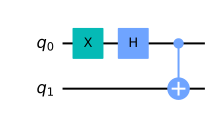

<IPython.core.display.Latex object>

In [12]:
#2
bell = QuantumCircuit(2)
bell.x(0)
bell.h(0)
bell.cx(0,1)
display(bell.draw())

svsim = Aer.get_backend('aer_simulator')
bell.save_statevector()
final_state = svsim.run(bell).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

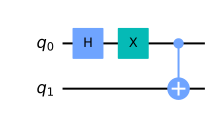

<IPython.core.display.Latex object>

In [13]:
#3
bell = QuantumCircuit(2)
bell.h(0)
bell.x(0)
bell.cx(0,1)
display(bell.draw())

svsim = Aer.get_backend('aer_simulator')
bell.save_statevector()
final_state = svsim.run(bell).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

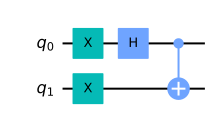

<IPython.core.display.Latex object>

In [14]:
#3
bell = QuantumCircuit(2)
bell.x(0)
bell.h(0)
bell.x(1)
bell.cx(0,1)
display(bell.draw())

svsim = Aer.get_backend('aer_simulator')
bell.save_statevector()
final_state = svsim.run(bell).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

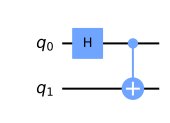

<IPython.core.display.Latex object>

In [15]:
#4
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0,1)
display(bell.draw())

svsim = Aer.get_backend('aer_simulator')
bell.save_statevector()
final_state = svsim.run(bell).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

## Question 6: Gym on Bloch sphere, `plot_bloch_multivector` vs `plot_bloch_vector`

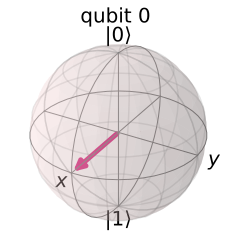

In [16]:
qc = QuantumCircuit(1,1)
## Wanna go to |+>
### code
qc.h(0)
###
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

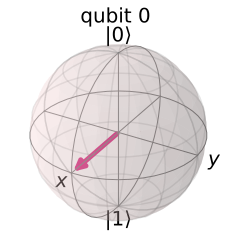

In [17]:
qc = QuantumCircuit(1,1)
## Wanna go to |+>
### code
qc.ry(math.pi/2,0)
###
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

## Question7: Gate operations

https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary

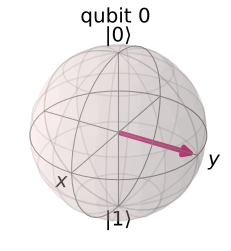

In [18]:
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0) ## Pi/2 rotation

svsim = Aer.get_backend('statevector_simulator')
statevector = svsim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

## Question 8: Bell state and initialize

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html

2 fragments of code

In [19]:
qc = QuantumCircuit(2)

### code here -> Want [1/sqt(2), 0 , 0 , 1/sqrt(2)]
qc.h(0)
qc.cx(0,1)
###


svsim = Aer.get_backend('statevector_simulator')
statevector = svsim.run(qc).result().get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [20]:
qc = QuantumCircuit(2)

### code here -> Want [1/sqt(2), 0 , 0 , 1/sqrt(2)]
v = [1/math.sqrt(2), 0, 0, 1/math.sqrt(2)]
qc.initialize(v,[0,1])
###


svsim = Aer.get_backend('statevector_simulator')
statevector = svsim.run(qc).result().get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

## Question 9: Qiskit API, multi-qubit gates

https://qiskit.org/documentation/apidoc/circuit_library.html

See `CXGate`, `MCXGate`

3 correct

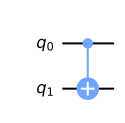

In [21]:
## produce a multi-qubit other than CNOT
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

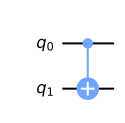

In [22]:
## produce a multi-qubit other than CNOT
qc = QuantumCircuit(2)
qc.cnot(0,1)
qc.draw()

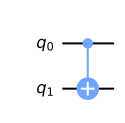

In [23]:
## produce a multi-qubit other than CNOT
qc = QuantumCircuit(2)
qc.mct([0],1) #### Notice list for first qubit: can have more than 1 control qubit
qc.draw()

## Question 10: Qiskit API, Toffoli gate

3 codes


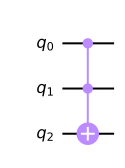

In [24]:
#1

qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()

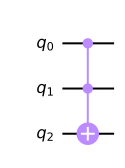

In [25]:
#2
qc = QuantumCircuit(3)
qc.mct([0,1],2)
qc.draw()

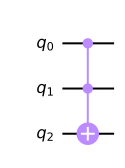

In [26]:
#3
from qiskit.circuit.library import CXGate

qc = QuantumCircuit(3)
ccx = CXGate().control() ## Can create ccx with multiple controls
qc.append(ccx,[0,1,2])
qc.draw()

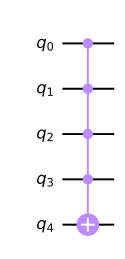

In [27]:
#test
from qiskit.circuit.library import CXGate

qc = QuantumCircuit(5)
c4cx = CXGate().control(3) ## Can create ccx with multiple controls: 3 extra controls
qc.append(c4cx,[0,1,2,3,4])
qc.draw()

## Question 11: Qiskit API, barrier

2 codes
* list
* empty

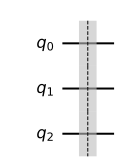

In [28]:
## Place a barrier across all qubits
qc = QuantumCircuit(3)

### code
qc.barrier([0,1,2])
### 

qc.draw()

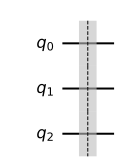

In [29]:
## Place a barrier across all qubits
qc = QuantumCircuit(3)

### code
qc.barrier()
### 

qc.draw()

## Question 12: Barrier, optimizing circuits

https://www.youtube.com/watch?v=tS2CMOyWFMQ

barrier: instructions to the transpiler

What fragment codes are equivalent to circuit if we remove the barrier

<img src="figures/exam_q12.png">

$TT=S$

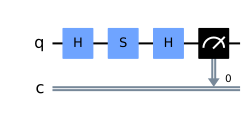

In [30]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.s(0)
qc.h(0)
qc.measure(0,0)
qc.draw()

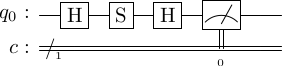

In [31]:
qc.draw(output='latex')

## Question 13: Barrier, circuit depth

Depth does not include `barrier` or `snapshot`

2


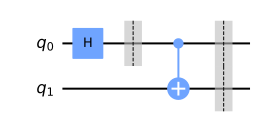

In [32]:
qc = QuantumCircuit(2)

qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])

print(qc.depth())

qc.draw()

2


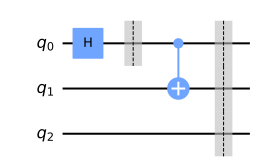

In [33]:
qc = QuantumCircuit(3)

qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1,2])

print(qc.depth())

qc.draw()

## Question 14: `execute` function parameters, coupling map, Aer `qasm_simulator`

code snippet for
* 1024 times
* QASM simulator
* coupling map that connects 3 qubits linearly

In [34]:
qc = QuantumCircuit(3)
#display(qc.draw())
## code
qasm_sim = Aer.get_backend("qasm_simulator")
couple_map = [[0,1],[1,2]]
job = execute(qc, backend=qasm_sim, coupling_map=couple_map, shots=1024)
##
# result = job.result()
# counts = result.get_counts()
# print(counts)

## Question 15:`execute` function parameters, coupling map, BasicAer `qasm_simulator`

https://qiskit.org/documentation/apidoc/providers_basicaer.html

https://qiskit.org/documentation/apidoc/execute.html

qubits coupled in a custom way

In [35]:
from qiskit import QuantumCircuit, execute, BasicAer
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)
#qc.append()

execute(qc, backend=backend, shots=1024, coupling_map=[[0,1],[1,2]])

No classical registers in circuit "circuit-158", counts will be empty.


## Question 16: BasicAer Simulators

https://qiskit.org/documentation/apidoc/providers_basicaer.html

In [36]:
backend = BasicAer.get_backend("qasm_simulator")
backend = BasicAer.get_backend("statevector_simulator")
backend = BasicAer.get_backend("unitary_simulator")

## Question 17: Assigning BasicAer simulators

https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html

Assign statevector simulator to backend


In [37]:
backend = BasicAer.get_backend("statevector_simulator")


## Question 18: QIS, creating an Operator

https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html

Yield an operator that represent a single-qubit X gate

In [38]:
qc = QuantumCircuit(1)
qc.x(0)
op = Operator(qc)

print(op.data)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


## Question 19: `quantum_info` API, process, and gate fidelity

What fidelity result for these two operators, which differ only by a global phase?

In [39]:
op_a = Operator(library.XGate())
op_b = np.exp(1j*0.5)*Operator(library.XGate())

print(average_gate_fidelity(op_a, op_b))
print(process_fidelity(op_a, op_b))

1.0
1.0


## Question 20: Mentally calculate statevector from circuit

__<font color='red'>Remeber order is from right to left!!</color>__

In [40]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.measure([0,1],[0,1])

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1000).result()
counts = result.get_counts()
print(counts)

{'01': 1000}


# Udemy

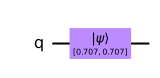

0.9999999999999998

In [41]:
a = 1/np.sqrt(2) 
desired_state = [a,np.sqrt(1-a**2)]
qc = QuantumCircuit(1)
qc.initialize(desired_state,0)

display(qc.draw())

back_sv = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back_sv).result()
qc_sv = result.get_statevector(qc)
state_fidelity(desired_state, qc_sv) 


In [42]:
q = QuantumRegister(1,'q')
qc = QuantumCircuit(q)
qc.y(0)
backend_unitary = BasicAer.get_backend('unitary_simulator') 
result = execute(qc,backend_unitary).result().get_unitary(decimals=3)
#print(result.get_counts())


In [43]:
from qiskit import *
import qiskit.tools.jupyter

from qiskit import IBMQ
# APIKEY ='1b4757e26ee36220c5ca60046f2c68b1e5c3af2dd2869a139453a03ea22dee2526af80384526e94557b625c992f7cb96c6413e99bea15da8b416c950fe11cc30'
# IBMQ.save_account('MY_API_TOKEN')
IBMQ.load_account()


%qiskit_backend_overview

In [44]:
%qiskit_version_table

/Users/ufranca/opt/anaconda3/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.3
qiskit-aer,0.9.0
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.5
qiskit,0.30.1
qiskit-nature,0.2.2
qiskit-finance,0.2.1
qiskit-optimization,0.2.3
qiskit-machine-learning,0.2.1


In [45]:
qiskit.execute_function

<module 'qiskit.execute_function' from '/Users/ufranca/opt/anaconda3/lib/python3.8/site-packages/qiskit/execute_function.py'>

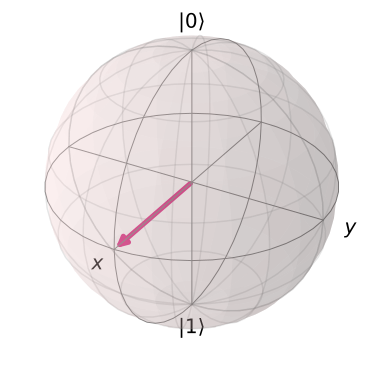

In [46]:
plot_bloch_vector([1,0,0])

In [47]:
qc.draw(output='latex')

# IBM test

In [48]:
from qiskit import IBMQ
import qiskit.tools.jupyter
%matplotlib inline

from qiskit import IBMQ
# APIKEY ='1b4757e26ee36220c5ca60046f2c68b1e5c3af2dd2869a139453a03ea22dee2526af80384526e94557b625c992f7cb96c6413e99bea15da8b416c950fe11cc30'
# IBMQ.save_account('MY_API_TOKEN')
IBMQ.load_account()

# IBMQ.save_account(APIKEY, overwrite=True)

%qiskit_backend_overview

ibmqfactory.load_account:WARNING:2022-02-10 13:15:15,206: Credentials are already in use. The existing account in the session will be replaced.


In [49]:
backend.status()

In [50]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [51]:
# from qiskit import IBMQ

# IBMQ.load_account()

# provider = IBMQ.get_provider(group='open', project='main')
# system = provider.get_backend('ibmq_manila')
# system.configuration()


In [52]:
# import qiskit.providers.ibmq.jupyter
# IBMQ.load_account()

# provider = IBMQ.get_provider(group='open', project='main')
# system = provider.get_backend('ibmq_manila')
# backend

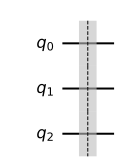

In [53]:
qc = QuantumCircuit(3)
qc.barrier(0,1,2)
qc.draw()

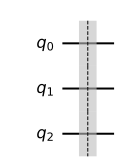

In [54]:
qc = QuantumCircuit(3)
qc.barrier([0,1,2])
qc.draw()

In [1]:
from qiskit import execute, Aer, ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector

qr = QuantumRegister(4)
circuit = QuantumCircuit(qr)

circuit.initialize([0,1], 0)
circuit.initialize([1,0], 1)
circuit.initialize([0,1], 2)
circuit.initialize([0,1], 3)

circuit.ccx(0, 2, 3)
circuit.cx(1, 3)
circuit.cx(0, 2)

state = Statevector.from_int(0, 2**4)
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>